In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb
- Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [8]:
s = pd.Series(np.random.normal(100, 10, 100))

In [12]:
multiplier = 1.5
q1 = s.quantile(.25)
q3 = s.quantile(.75)
iqr = q3 - q1
upper_bound = q3 + multiplier*iqr
lower_bound = q1 - multiplier*iqr
lower_bound, upper_bound

(74.8166815406253, 124.10822775204886)

In [13]:
# make a function
def get_lower_and_upper_bounds(s, multiplier = 1.5):
    q1 = s.quantile(.25)
    q3 = s.quantile(.75)
    iqr = q3 - q1
    upper_bound = q3 + multiplier*iqr
    lower_bound = q1 - multiplier*iqr
    return lower_bound, upper_bound

In [14]:
# validate function
get_lower_and_upper_bounds(s, 1.5)

(74.8166815406253, 124.10822775204886)

## Exercise 2
Using lemonade.csv dataset and focusing on continuous variables:

In [18]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6af5008fa40071d8b0e064655c2886ef/raw/389449c3c96959e97e38f5b93d7d6e69d3455b6a/lemonade.csv")
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [23]:
df.columns = [x.lower() for x in df.columns]
df.head()

,date,day,temperature,rainfall,flyers,price,sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
date           365 non-null object
day            365 non-null object
temperature    365 non-null float64
rainfall       365 non-null float64
flyers         365 non-null int64
price          365 non-null float64
sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [48]:
#get outliers for the temeprature column
lower_bound, upper_bound = get_lower_and_upper_bounds(df.temperature)

df[(df.temperature < lower_bound)].temperature

364    15.1
Name: temperature, dtype: float64

In [59]:
list(range(2,7))

[2, 3, 4, 5, 6]

In [62]:
print("Lower outliers")
for n in range(2,7):
    lower_bound, upper_bound = get_lower_and_upper_bounds(df.iloc[:,n])
    print(df[(df.iloc[:,n] < lower_bound)].iloc[:,n])

lower outliers
364    15.1
Name: temperature, dtype: float64
Series([], Name: rainfall, dtype: float64)
324   -38
Name: flyers, dtype: int64
Series([], Name: price, dtype: float64)
Series([], Name: sales, dtype: int64)


Negiative flyers makes no sense


- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [64]:
print("upper outliers")
for n in range(2,7):
    lower_bound, upper_bound = get_lower_and_upper_bounds(df.iloc[:,n])
    print(df[(df.iloc[:,n] > upper_bound)].iloc[:,n])

upper outliers
41    212.0
Name: temperature, dtype: float64
0      2.00
1      1.33
2      1.33
5      1.54
6      1.54
10     1.54
11     1.33
12     1.33
15     1.67
16     1.43
19     1.43
23     1.54
27     1.33
28     1.33
337    1.54
338    1.82
342    1.43
343    1.82
345    1.33
346    1.43
347    1.54
350    1.33
351    1.43
354    1.33
355    1.54
359    1.43
363    1.43
364    2.50
Name: rainfall, dtype: float64
166    77
194    80
Name: flyers, dtype: int64
Series([], Name: price, dtype: float64)
183    235
184    534
185     99
258     87
Name: sales, dtype: int64


Not sure if they make sense or not.

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [65]:
print("Lower outliers")
for n in range(2,7):
    lower_bound, upper_bound = get_lower_and_upper_bounds(df.iloc[:,n],3)
    print(df[(df.iloc[:,n] < lower_bound)].iloc[:,n])

Lower outliers
Series([], Name: temperature, dtype: float64)
Series([], Name: rainfall, dtype: float64)
324   -38
Name: flyers, dtype: int64
Series([], Name: price, dtype: float64)
Series([], Name: sales, dtype: int64)


- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [66]:
print("upper outliers")
for n in range(2,7):
    lower_bound, upper_bound = get_lower_and_upper_bounds(df.iloc[:,n],3)
    print(df[(df.iloc[:,n] > upper_bound)].iloc[:,n])

upper outliers
41    212.0
Name: temperature, dtype: float64
0      2.00
338    1.82
343    1.82
364    2.50
Name: rainfall, dtype: float64
Series([], Name: flyers, dtype: int64)
Series([], Name: price, dtype: float64)
183    235
184    534
185     99
258     87
Name: sales, dtype: int64


## Exercise 3
Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
- Should certain outliers be kept or removed?

In [79]:
df.iloc[:,2].name

'temperature'

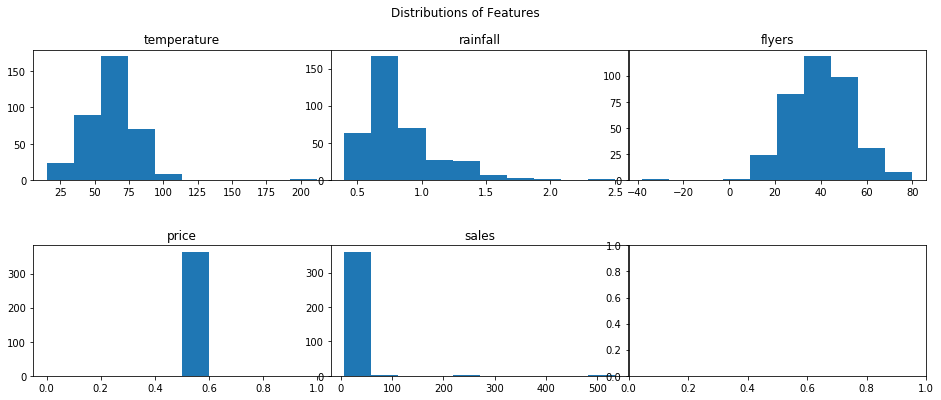

In [89]:
fig, axs = plt.subplots(2,3, figsize=(16, 6))
fig.subplots_adjust(hspace = .5, wspace=.001)
fig.suptitle('Distributions of Features')
axs = axs.flatten()
for i in range(5):
    axs[i].hist(df.iloc[:,i +2])
    axs[i].set_title(df.iloc[:,i +2].name)


price and sales look like not normally distributed

In [98]:
# Calculate the z-score 
#zscores = pd.Series((x - x.mean()) / x.std())

print(df[((df.temperature - df.temperature.mean())/df.temperature.std() ).abs()>2].temperature)

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: temperature, dtype: float64


In [95]:
def z_score(s):
    return (s - s.mean()) / s.std()

In [100]:
print("2 sigma outliers")
for x in ['temperature','rainfall','flyers']:
    print(df[z_score(df[x]).abs()>2][x])

2 sigma outliers
41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: temperature, dtype: float64
0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: rainfall, dtype: float64
166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: flyers, dtype: int64


## Exercise 4
Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [102]:
print("3 sigma outliers")
for x in ['temperature','rainfall','flyers']:
    print(df[z_score(df[x]).abs()>3][x])

3 sigma outliers
41    212.0
Name: temperature, dtype: float64
0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: rainfall, dtype: float64
324   -38
Name: flyers, dtype: int64
